In [1]:
from simple_foraging_env import SimpleForagingEnv, SimpleAgent, RandomAgent
from opponent_model import OpponentModel, SubGoalSelector
from q_agent import QLearningAgent, ReplayBuffer
from q_agent_classic import QLearningAgentClassic
from omg_args import OMGArgs
import transformers as t
import matplotlib.pyplot as plt
import torch
import os
import random
import numpy as np
from collections import deque
from typing import Deque, Dict, List, Tuple, Optional

In [4]:
from experiments.om import q_agent


env = SimpleForagingEnv(grid_size=7, max_steps=30)

obs_sample = env.reset()[0]
H, W, F_dim = obs_sample.shape
NUM_ACTIONS = 4

args = OMGArgs(
  device="cpu",
  folder_id="0",
  batch_size=32,
  horizon_H=6,
  qnet_hidden=256,
  max_steps=30,
  selector_mode="conservative",
  vae_beta=0.1,
  beta_start=1.0,
  beta_end=2.0,
  selector_tau_start=2.0,
  selector_tau_end=0.1,
  state_shape=obs_sample.shape,
  H=H, W=W,
  state_feature_splits=(F_dim,),
  action_dim=NUM_ACTIONS,
  latent_dim=32,
  d_model=256,
  nhead=4,
  num_encoder_layers=1,
  num_decoder_layers=1,
  dim_feedforward=1024,
  dropout=0.1,
)

os.makedirs("./diagrams_0", exist_ok=True)

vae = t.TransformerVAE(args)
cvae = t.TransformerCVAE(args)
vae.load_state_dict(torch.load('./models_0/vae.pth', map_location=args.device))
# cvae.load_state_dict(torch.load('./models_0/cvae.pth', map_location=args.device))
selector = SubGoalSelector(args)

op_model = OpponentModel(
  cvae, vae, selector, args=args)

q_agent = QLearningAgent(
    env=env,
    opponent_model=op_model,
    args=args
)
q_agent.q.load_state_dict(torch.load('./models_0/qnet.pth', map_location=args.device))

<All keys matched successfully>

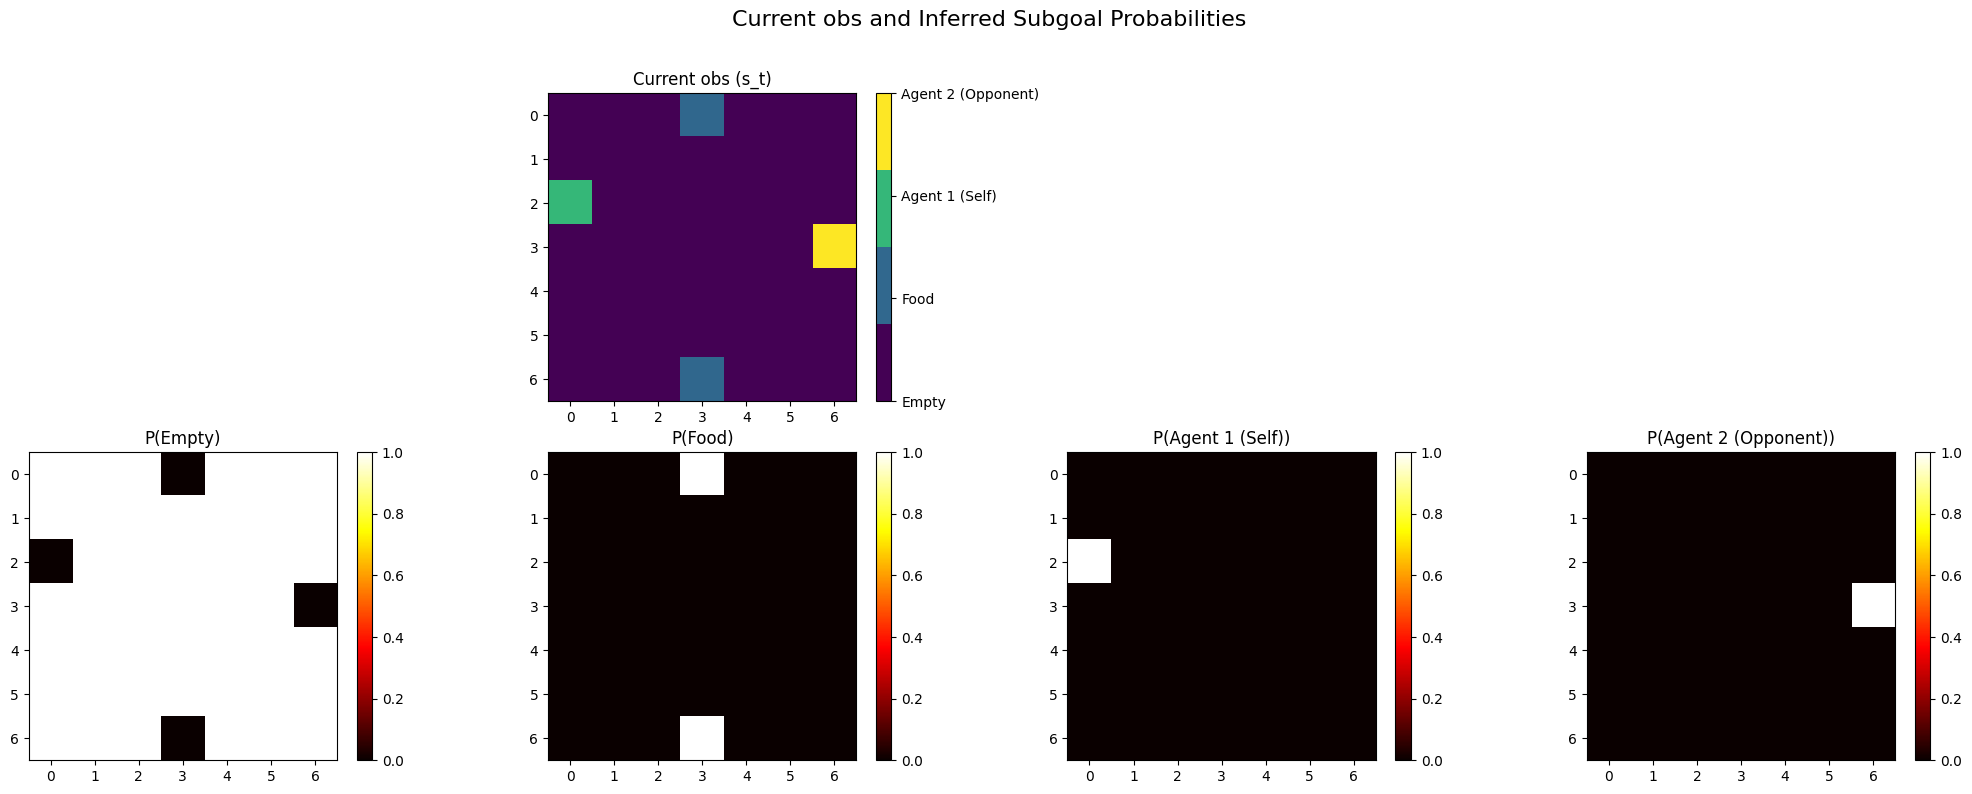

[ 2.81287313e-01  4.63097990e-01 -1.28303021e-02 -1.43066645e-02
 -1.00867733e-01 -1.23637050e-01 -4.66719031e-01  1.38990521e+00
  8.13903034e-01  2.04732157e-02  2.10256413e-01  3.29750657e-01
  2.36477554e-02 -6.32943511e-02  8.77859816e-02 -6.96959496e-02
 -8.09293985e-03 -3.92076373e-02  1.20964003e+00  4.97963466e-02
 -5.20238876e-02  5.70950985e-01  1.25119781e+00 -1.15517497e+00
  1.20962970e-03 -5.94102979e-01 -1.27206910e+00 -5.62548339e-01
 -6.04978651e-02  6.95367157e-03 -1.13559507e-01  1.20500959e-02]


In [5]:
env._place_agent(0, (2, 0))
obs = env._get_observations()
op_model.prior_model.eval()
recon_logits, mu, logvar = op_model.prior_model(
    torch.from_numpy(obs[0]).float().unsqueeze(0).to(args.device)
)
op_model.visualize_subgoal_logits(
    obs[0], recon_logits)
print(mu.squeeze(0).detach().cpu().numpy())

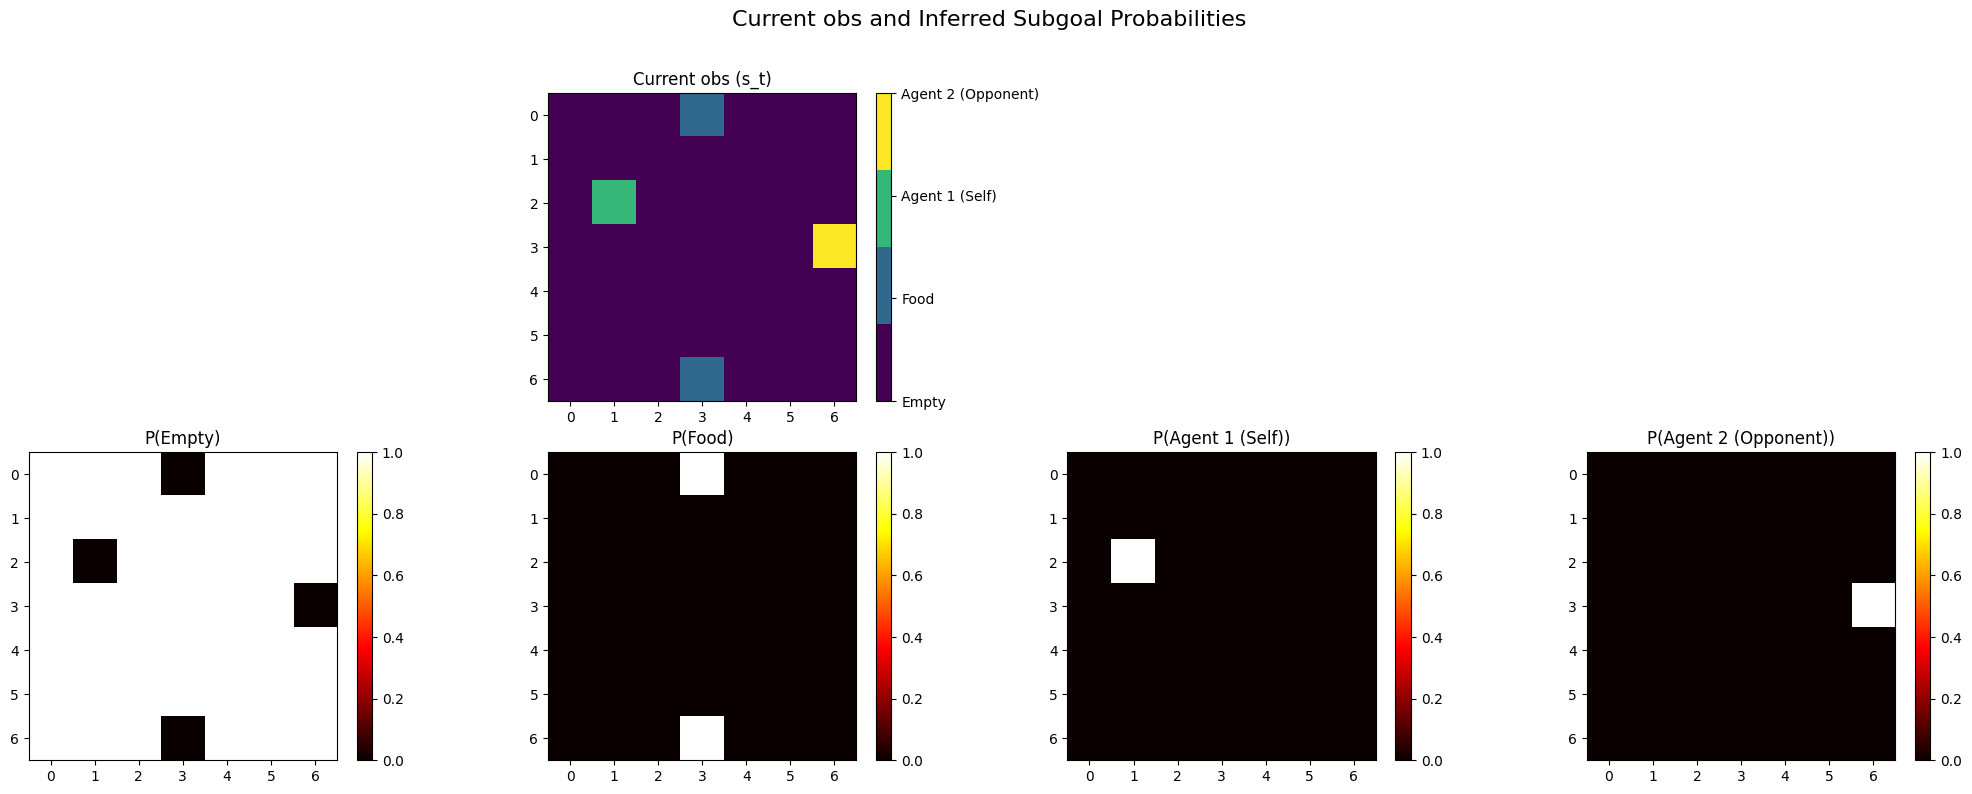

[ 9.8925292e-02  2.5086701e-01 -4.6119094e-04 -3.9672852e-04
 -3.7222221e-02 -1.3762113e-01  3.2450280e-01  2.3908935e+00
  6.8479037e-01 -2.3001077e-02 -2.1437198e-02  4.1338238e-01
  3.0720308e-02 -3.1408519e-02  5.5078194e-03 -3.7041232e-03
 -1.3951369e-02 -3.7205696e-02  1.1828249e+00  1.8988770e-02
 -2.3710489e-02 -4.7794750e-01  7.0306307e-01  1.6884892e-01
 -7.3298234e-03 -3.4619549e-01 -1.2747123e+00 -5.0747150e-01
 -5.6297593e-02  1.3723478e-02 -3.8702056e-02  6.1024651e-03]


In [6]:
env._place_agent(0, (2, 1))
obs = env._get_observations()
op_model.prior_model.eval()
recon_logits, mu, logvar = op_model.prior_model(
    torch.from_numpy(obs[0]).float().unsqueeze(0).to(args.device)
)
op_model.visualize_subgoal_logits(
    obs[0], recon_logits)
print(mu.squeeze(0).detach().cpu().numpy())

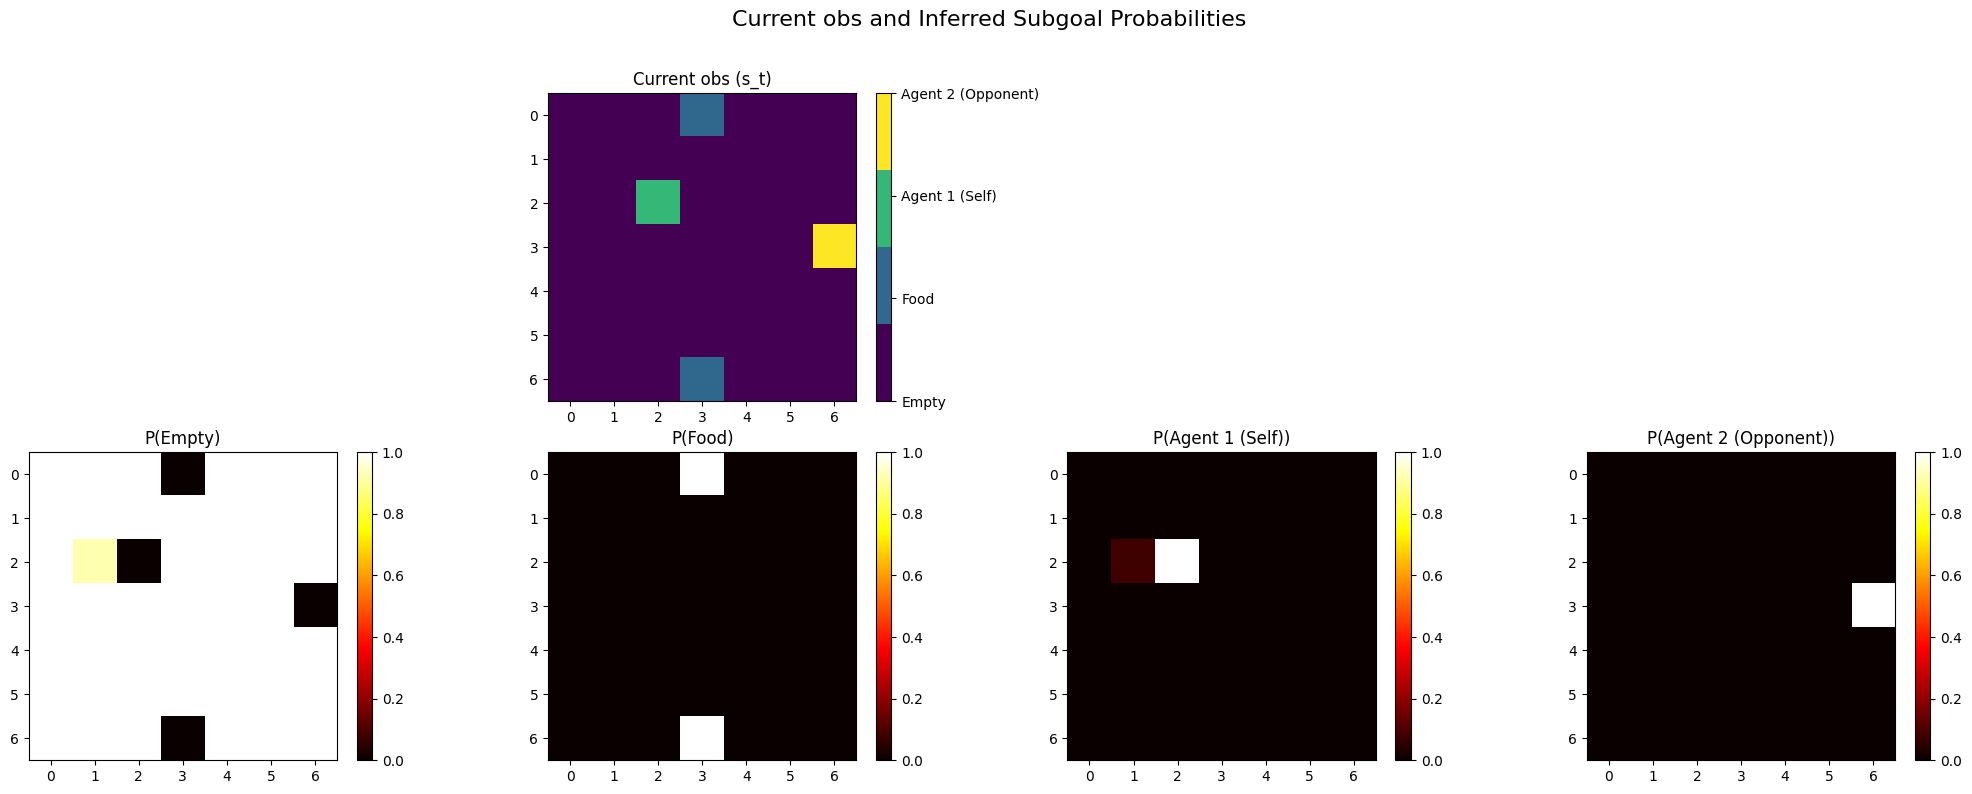

[-0.16230248 -0.04270241  0.00651418 -0.00531529 -0.00405874  0.02187333
  1.5077056   2.3489633   0.29218733 -0.04212862  0.1059432   0.42389768
  0.01632197 -0.00975066 -0.03222732  0.01495027 -0.01654162 -0.04351081
  1.0559168   0.00393094  0.02896432 -0.7147744  -0.03445563  0.9654361
 -0.02742303 -0.55563    -1.20814    -0.38712883 -0.03147104  0.00474631
  0.00329019  0.00269598]


In [7]:
env._place_agent(0, (2, 2))
obs = env._get_observations()
op_model.prior_model.eval()
recon_logits, mu, logvar = op_model.prior_model(
    torch.from_numpy(obs[0]).float().unsqueeze(0).to(args.device)
)
op_model.visualize_subgoal_logits(
    obs[0], recon_logits)
print(mu.squeeze(0).detach().cpu().numpy())

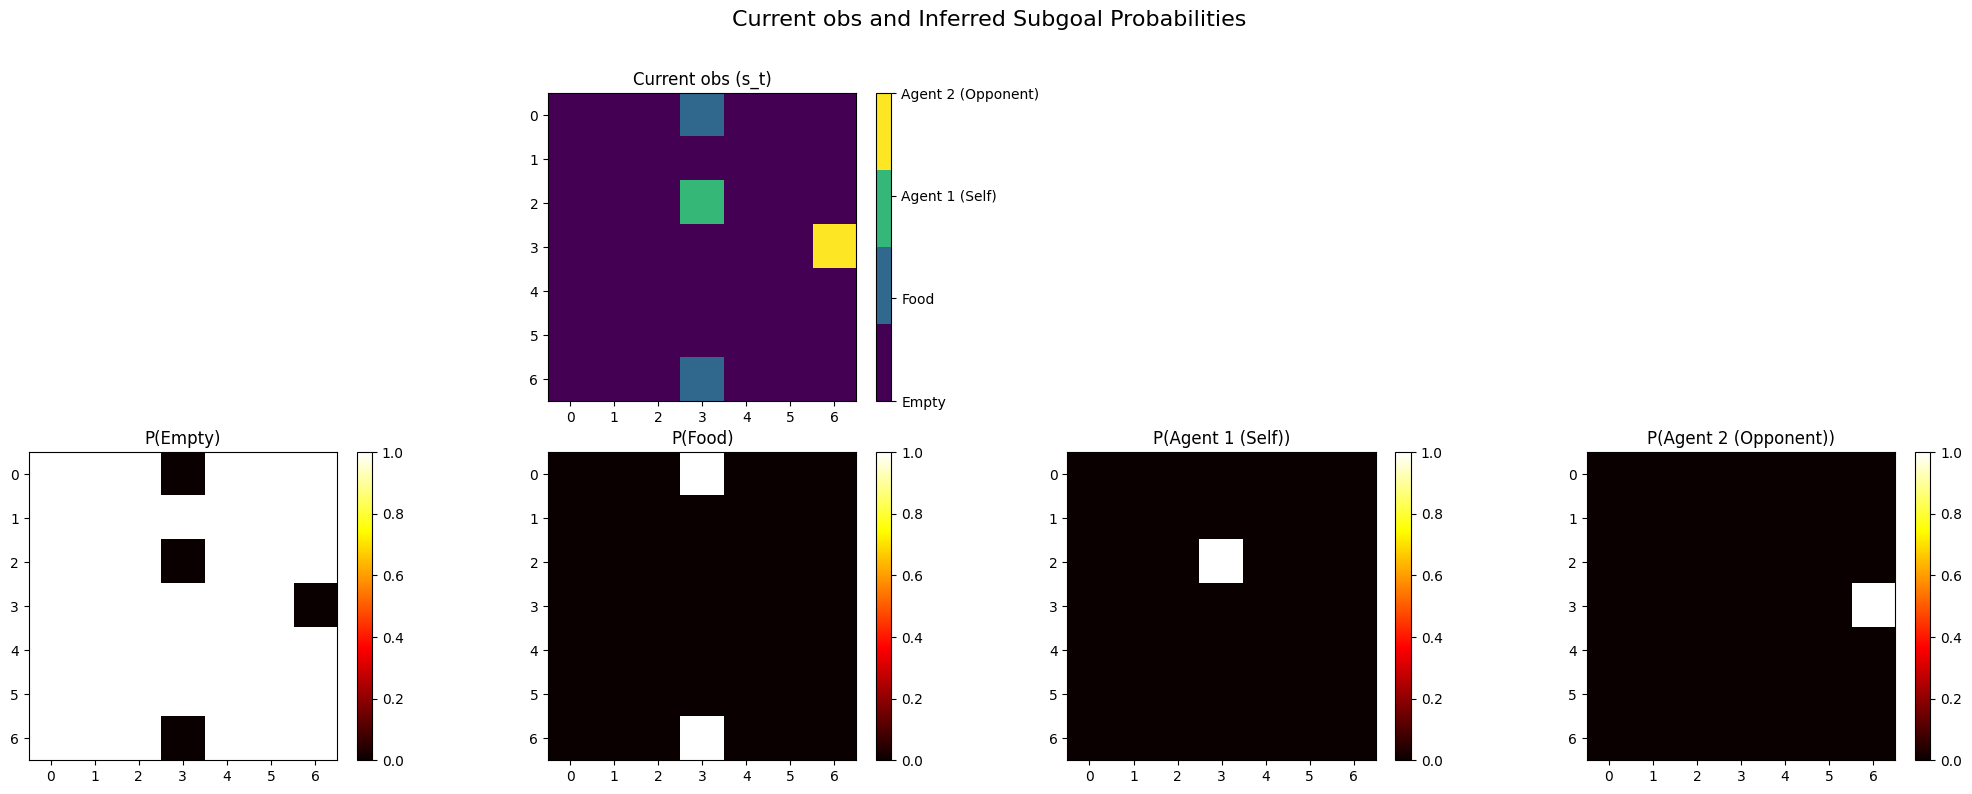

[-2.65687704e-01 -1.75986379e-01 -1.29897594e-02 -1.63058490e-02
 -4.76007648e-02  1.06920525e-01  2.62571406e+00  1.29214704e+00
 -1.04875207e-01 -2.65032351e-02  2.92857915e-01  4.29961652e-01
 -2.01507807e-02 -3.54672074e-02  2.96700150e-02 -3.18281911e-02
  2.42617726e-03 -4.72483635e-02  1.00990665e+00  3.11899409e-02
  7.52705485e-02 -3.87112677e-01 -4.01342958e-01  8.38242888e-01
 -1.95861161e-02 -8.50252748e-01 -1.21104634e+00 -3.45244467e-01
 -3.96583080e-02 -7.55580142e-03 -5.03464378e-02  2.49396823e-02]


In [8]:
env._place_agent(0, (2, 3))
obs = env._get_observations()
op_model.prior_model.eval()
recon_logits, mu, logvar = op_model.prior_model(
    torch.from_numpy(obs[0]).float().unsqueeze(0).to(args.device)
)
op_model.visualize_subgoal_logits(
    obs[0], recon_logits)
print(mu.squeeze(0).detach().cpu().numpy())

In [23]:
from wandb import agent


def oracle_subgoal(x: torch.tensor):
  agent_idx = (x[..., 2] == 1).nonzero(as_tuple=False)
  opp_idx = (x[..., 3] == 1).nonzero(as_tuple=False)
  food_idxs = (x[..., 1] == 1).nonzero(as_tuple=False)
  # we know that opponent goes to the top food first
  # if there are still 2 food items, place opponent at the top one
  # else, place him at the only food item
  if len(food_idxs) == 2:
    target_food = food_idxs[food_idxs[:, 1].argmin()].unsqueeze(0)
  elif len(food_idxs) == 1:
    target_food = food_idxs[0].unsqueeze(0)
  else:
    target_food = None

  if target_food is not None:
    # move opponent to target food position
    x_clone = x.clone()

    H_coord = opp_idx[0, 1]
    W_coord = opp_idx[0, 2]

    H_target = target_food[0, 1]
    W_target = target_food[0, 2]

    H_agent = agent_idx[0, 1]
    W_agent = agent_idx[0, 2]

    # handle agent
    x_clone[0, H_agent, W_agent, 0] = 1  # place empty
    x_clone[..., 2] = 0  # remove self agent
    x_clone[0, 0, 0, 2] = 1
    x_clone[0, 0, 0, 0] = 0

    # handle opponent
    x_clone[0, H_coord, W_coord, 3] = 0  # remove opponent
    x_clone[0, H_coord, W_coord, 0] = 1  # place empty
    x_clone[0, H_target, W_target, 1] = 0  # remove food
    x_clone[0, H_target, W_target, 3] = 1  # place opponent
    x = x_clone
  return x

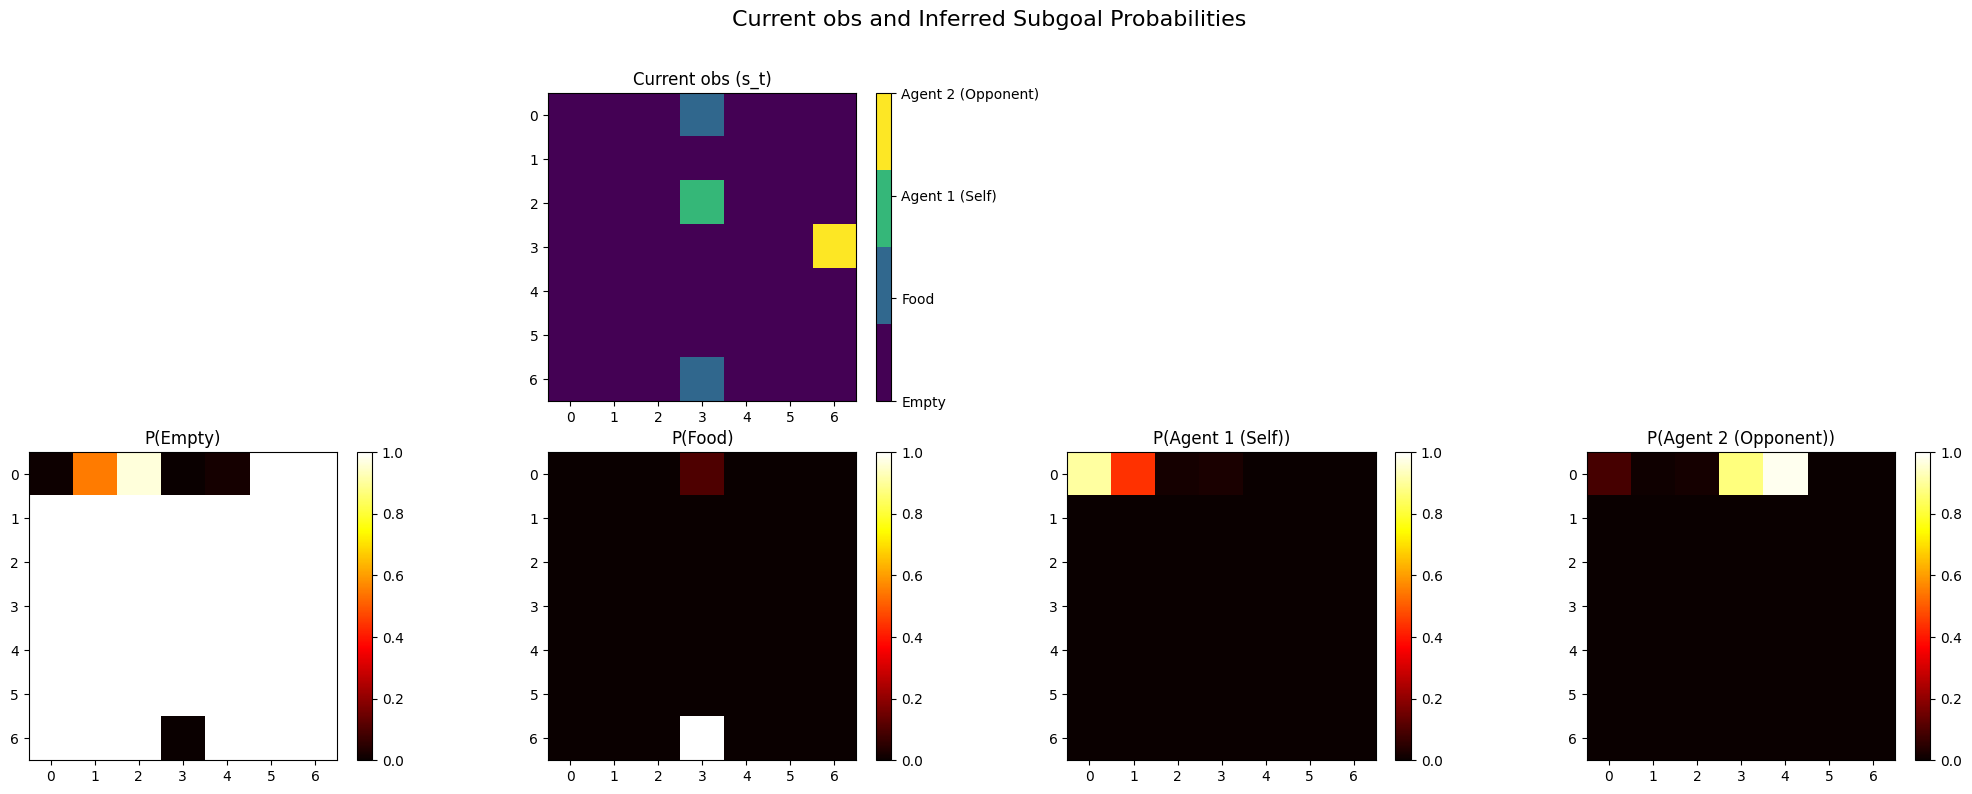

[-8.3893889e-01  3.3828300e-01 -2.1352768e-03 -8.7337866e-02
 -3.7317383e-01  6.3846874e-01 -4.4764644e-01 -9.1850603e-01
 -1.8385658e-01  1.1149934e-01 -3.5043530e+00  8.0504835e-01
 -1.4394537e-02 -2.4997643e-01  5.4653990e-01 -3.6243868e-01
  8.3804421e-02  7.2835088e-03 -6.5017462e-01  1.5097299e-01
 -5.2901316e-01 -1.7528329e+00  4.1221094e-01 -9.5660406e-01
  1.6592291e-01 -2.0022035e+00  1.2298656e+00 -4.3160746e-01
 -2.4879599e-01 -8.2213268e-02 -4.8553163e-01  1.0190446e-01]


In [22]:
env._place_agent(0, (2, 3))
obs = env._get_observations()[0]
x = oracle_subgoal(torch.from_numpy(obs).float().unsqueeze(0).to(args.device))
op_model.prior_model.eval()
recon_logits, mu, logvar = op_model.prior_model(x)
op_model.visualize_subgoal_logits(
    obs, recon_logits)
print(mu.squeeze(0).detach().cpu().numpy())

In [ ]:
action_names = {0: "UP", 1: "DOWN", 2: "LEFT", 3: "RIGHT"}
def _choose_action(qvals: torch.Tensor) -> int:
    qvals = qvals.squeeze(0)  # (A,)
    max_q = torch.max(qvals).item()
    max_actions = (qvals == max_q).nonzero(as_tuple=False).view(-1)
    if len(max_actions) > 1:
      return int(max_actions[torch.randint(len(max_actions), (1,))].item())
    return int(torch.argmax(qvals, dim=-1).item())

def select_action(s_t: np.ndarray, history: Dict[str, List[torch.Tensor]]) -> Tuple[int, torch.Tensor]:
  """
  (interaction phase) Infer g_hat and act eps-greedily on Q(s,g_hat,*)
  """
  ghat_mu, ghat_logvar = q_agent._infer_ghat(s_t, history)  # (1, latent_dim)
  s = torch.from_numpy(s_t).float().unsqueeze(0).to(args.device)
  qvals = q_agent.q(s, ghat_mu)
  print("\t\t\tUP DOWN LEFT RIGHT")
  print(f"Infered latent Q: {qvals.squeeze(0).detach().cpu().numpy()}")
  a = _choose_action(qvals)
  return a, ghat_mu.squeeze(0), ghat_logvar.squeeze(0)

def select_action_random_latent(s_t: np.ndarray) -> Tuple[int, torch.Tensor]:
  """
  (interaction phase) Infer g_hat and act eps-greedily on Q(s,g_hat,*)
  """
  ghat_mu = torch.randn(1, args.latent_dim).to(args.device)
  ghat_logvar = torch.randn(1, args.latent_dim).to(args.device)
  s = torch.from_numpy(s_t).float().unsqueeze(0).to(args.device)
  qvals = q_agent.q(s, ghat_mu)
  print(f"Random latent Q: {qvals.squeeze(0).detach().cpu().numpy()}")
  a = _choose_action(qvals)
  return a, ghat_mu.squeeze(0), ghat_logvar.squeeze(0)

In [ ]:
replay = ReplayBuffer(10_000)
opponent_agent = SimpleAgent(1)
  
for episode in range(100):
  opponent_agent.reset()
  obs = env.reset()
  done = False
  ep_ret = 0.0

  # History container
  history_len = args.max_history_length
  history = {
      "states": deque(maxlen=history_len),
      "actions": deque(maxlen=history_len)
  }

  step_buffer = deque(maxlen=args.horizon_H + 1)

  for step in range(args.max_steps or 500):
    # Convert deque to list for the model
    current_history = {k: list(v) for k, v in history.items()}

    a, ghat_mu, ghat_logvar = select_action(obs[0], current_history)
    a_opponent = opponent_agent.select_action(obs[1])
    actions = {0: a, 1: a_opponent}
    next_obs, reward, done, info = env.step(actions)

    # Store the current step's info
    step_info = {
        "state": obs[0].copy(),
        "action": a,
        "reward": float(reward[0]),
        "next_state": next_obs[0].copy(),
        "done": bool(done),
        "infer_mu": ghat_mu.detach().cpu(),
        "infer_log_var": ghat_logvar.detach().cpu(),
        "history": {k: [t.clone() for t in v] for k, v in current_history.items()}
    }
    step_buffer.append(step_info)

    # Once the buffer is full, the oldest step has its full future window
    if len(step_buffer) == args.horizon_H + 1:
      transition_to_store = step_buffer[0]
      future_states = [s["state"] for s in list(step_buffer)[1:]]
      transition_to_store["future_states"] = future_states
      replay.push(transition_to_store)
    elif done and len(step_buffer) > 1:
      # If episode ends, fill the future window with remaining states
      while len(step_buffer) > 1:
        transition_to_store = step_buffer.popleft()
        future_states = [s["state"] for s in list(step_buffer)]
        # Fill the rest with copies of the terminal state
        for _ in range(args.horizon_H - len(future_states)):
          future_states.append(step_buffer[-1]["state"])
        transition_to_store["future_states"] = future_states
        replay.push(transition_to_store)

    # Update history for the next step
    history["states"].append(torch.from_numpy(obs[0]).float())
    history["actions"].append(torch.tensor(a, dtype=torch.long))

    ep_ret += reward[0]
    obs = next_obs

    if done:
      break
  print(f"Episode {episode + 1} Return: {ep_ret}")
print("Data collection complete.")

In [ ]:
def run_episode():
  opponent_agent = SimpleAgent(1)
  obs = env.reset()
  done = False
  ep_ret = 0.0

  # History container
  history_len = args.max_history_length
  history = {
      "states": deque(maxlen=history_len),
      "actions": deque(maxlen=history_len)
  }

  for step in range(args.max_steps or 500):
    # Convert deque to list for the model
    current_history = {k: list(v) for k, v in history.items()}

    a, ghat_mu, ghat_logvar = select_action_random_latent(obs[0])
    a, ghat_mu, ghat_logvar = select_action(obs[0], current_history)
    a_opponent = opponent_agent.select_action(obs[1])
    actions = {0: a, 1: a_opponent}
    env.render_from_obs(obs[0])
    print("Selected action:", action_names[a])
    print(ghat_mu.detach().cpu().numpy())

    
    next_obs, reward, done, info = env.step(actions)

    # Update history for the next step
    history["states"].append(torch.from_numpy(obs[0]).float())
    history["actions"].append(torch.tensor(a, dtype=torch.long))

    ep_ret += reward[0]
    obs = next_obs

    if done:
      break

In [ ]:
run_episode()

In [ ]:
batch_list = replay.sample(1)
om_batch = {
        # States: (B, H, W, F)
        "states": torch.stack([torch.from_numpy(b["state"]).float() for b in batch_list], dim=0),
        "history": q_agent._collate_history([b["history"] for b in batch_list]),
        "future_states": torch.stack([torch.from_numpy(np.stack(b["future_states"])) for b in batch_list], dim=0),
        "infer_mu": torch.stack([b["infer_mu"] for b in batch_list], dim=0),
        "infer_log_var": torch.stack([b["infer_log_var"] for b in batch_list], dim=0),
        "dones": torch.tensor([b["done"] for b in batch_list], dtype=torch.float32, device=args.device)
    }
print(om_batch["states"].shape)
print(len(om_batch["history"]))
print(om_batch["future_states"].shape)
print(om_batch["infer_mu"].shape)
print(om_batch["infer_log_var"].shape)


In [ ]:
op_model.inference_model.eval()
with torch.no_grad():
    recon_logits, mu, logvar = op_model.inference_model(
        om_batch["states"],
        om_batch["history"],
    )
print("Reconstructed logits shape:", recon_logits.shape)
print("Inferred mu shape:", mu)
print("Inferred logvar shape:", logvar)
op_model.visualize_subgoal_logits(
    om_batch["states"][0].numpy(), recon_logits)